# Modeling without normalizing

In [3]:
import pandas as pd 

df = pd.read_csv('/home/pitu/Documents/jupyter/data/wine/winequality-white.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


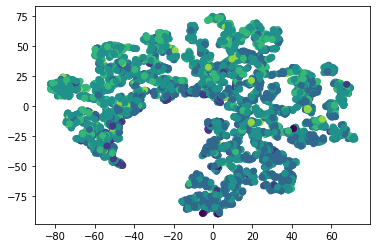

In [11]:
# Import TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df.drop('quality',axis=1))

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Categorical varieties
label_encoder = LabelEncoder()

varieties_cat = label_encoder.fit_transform(df['quality'])
# Scatter plot, coloring by variety_numbers
#rcParams['figure.figsize'] = 5, 5
plt.scatter(xs,ys,c=varieties_cat)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality',axis=1), df['quality'],test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.47346938775510206


In [13]:
print(df.var())

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64


# Log Normalization


In [17]:
import numpy as np
# Print out the variance of the Proline column
print(df['total sulfur dioxide'].var())

# Apply the log normalization function to the Proline column
df['total sulfur dioxide log'] = np.log(df['total sulfur dioxide'])

# Check the variance of the normalized Proline column
print(df['total sulfur dioxide log'].var())

1806.0854908480976
0.11297492779103678
